In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Visualizing the data

__Author:__ Ji Won Park (@jiwoncpark)

__Created:__ 3/08/2021

__Last run:__ 3/08/2021

__Goals:__
We visualize the input graph 

__Before_running:__
Generate the dataset, e.g.
```bash
python n2j/generate_training_labels.py
```

In [2]:
from n2j.trainval_data.graphs.cosmodc2_graph import CosmoDC2Graph
# Features to compile

features = ['ra', 'dec', 'galaxy_id', 'redshift']
features += ['ra_true', 'dec_true', 'redshift_true']
features += ['ellipticity_1_true', 'ellipticity_2_true']
features += ['bulge_to_total_ratio_i', 'ellipticity_1_bulge_true', 'ellipticity_1_disk_true',
             'ellipticity_2_bulge_true', 'ellipticity_2_disk_true', ]
features += ['shear1', 'shear2', 'convergence']
features += ['size_bulge_true', 'size_disk_true', 'size_true']
features += ['mag_{:s}_lsst'.format(b) for b in 'ugrizY']
healpixes = [10450]
raytracing_out_dirs = ['../cosmodc2_raytracing_{:d}'.format(hp) for hp in healpixes]
dataset = CosmoDC2Graph(features=features,
                        raytracing_out_dirs=raytracing_out_dirs,
                        healpixes=healpixes,
                        n_data=[100],
                        aperture_size=1.0,
                        stop_mean_std_early=True)

Which sightlines should we plot? Maybe we want to check out the overdense ones, with high $\kappa$.

In [3]:
for i in range(100):
    if dataset[i].y[0, 0] > 0.05:
        print(i, dataset[i].y)

1 tensor([[0.0571, 0.0066, 0.0246]])
20 tensor([[0.0564, 0.0099, 0.0530]])
64 tensor([[0.0919, 0.0073, 0.0196]])
81 tensor([[ 0.0554, -0.0466,  0.0137]])
90 tensor([[ 0.0594, -0.0076,  0.0340]])


Let's now color the nodes by the redshift.

In [4]:
sightlines = dataset.datasets[0].sightlines

2.0114190578460693


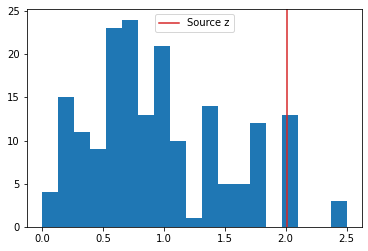

In [5]:
data_i = 90
sample_data = dataset[data_i]
z_src = sightlines.iloc[data_i]['z']
print(z_src)
z = sample_data.x[:, 3].numpy()
z[0] = z_src
plt.hist(z, bins=np.linspace(0, 2.5, 20))
plt.axvline(z_src, color='tab:red', label='Source z')
plt.legend()

torch.Size([187, 26]) torch.Size([2, 7441])
tensor([[ 0.0594, -0.0076,  0.0340]])


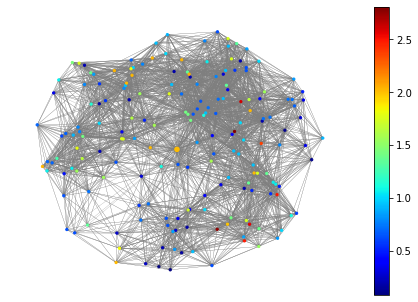

In [6]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib

data_i = 90
cmap = matplotlib.cm.get_cmap('jet')
sample_data = dataset[data_i]
sample_networkx = to_networkx(sample_data)
n_nodes = sample_data.x.shape[0]
# Color by redshift
z = sample_data.x[:, 3].numpy()
z[0] = sightlines.iloc[data_i]['z']
scaled_z = (z - z.min())/(z.max() - z.min())  # scale 0 to 1 for colormap
node_color = cmap(scaled_z)
# Make sightline node bigger
node_size = np.ones(n_nodes)*5
node_size[0] = 20
nx.draw(sample_networkx, pos=dict(zip(range(n_nodes), sample_data.x[:, 4:6].tolist())),
        width=0.2, edge_color='tab:gray', arrowsize=1, alpha=1.0, 
        node_color=node_color, node_size=node_size)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=z.min(), vmax=z.max()))
sm.set_array([])
plt.colorbar(sm)

print(sample_data.x.shape, sample_data.edge_index.shape)
print(sample_data.y)

We can additionally scale the node size by the (inverse) i-band magnitude.

torch.Size([187, 26]) torch.Size([2, 7441])
tensor([[ 0.0594, -0.0076,  0.0340]])


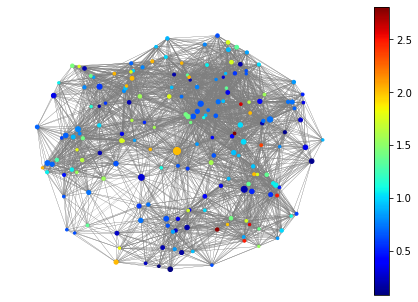

In [7]:
import matplotlib

data_i = 90
cmap = matplotlib.cm.get_cmap('jet')
sample_data = dataset[data_i]
sample_networkx = to_networkx(sample_data)
n_nodes = sample_data.x.shape[0]
# Color by redshift
z = sample_data.x[:, 3].numpy()
z[0] = sightlines.iloc[data_i]['z']
scaled_z = (z - z.min())/(z.max() - z.min())  # scale 0 to 1 for colormap
node_color = cmap(scaled_z)
# Make brighter nodes bigger
mag = -sample_data.x[:, -3].numpy()
mag[0] = np.mean(mag[1:])
node_size = (mag - mag.min())/(mag.max() - mag.min())*30 + 5
node_size[0] = 50

nx.draw(sample_networkx, pos=dict(zip(range(n_nodes), sample_data.x[:, 4:6].tolist())),
        width=0.2, edge_color='tab:gray', arrowsize=1, alpha=1.0, 
        node_color=node_color, node_size=node_size)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=z.min(), vmax=z.max()))
sm.set_array([])
plt.colorbar(sm)

print(sample_data.x.shape, sample_data.edge_index.shape)
print(sample_data.y)